In [4]:
import os
import numpy as np
from tqdm.auto import tqdm

directory = 'output/embeddings_citations/'

embs = []
for f in tqdm(os.listdir(directory)):
    if f.endswith('.npy'):
        df = np.load(directory + f)
        embs.append(df)

embs = np.vstack(embs)

embs.shape

  0%|          | 0/48 [00:00<?, ?it/s]

(96565, 768)

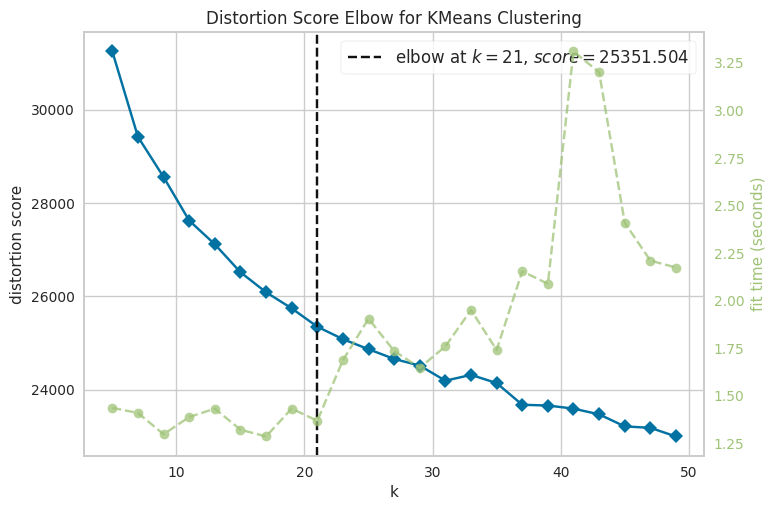

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

plt.set_loglevel('error')

model = KMeans()
visualizer = KElbowVisualizer(model, k=range(5, 50, 2))

visualizer.fit(embs)
visualizer.show()

/home/vscode/.local/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 96565 samples in 0.051s...
[t-SNE] Computed neighbors for 96565 samples in 10.225s...
[t-SNE] Computed conditional probabilities for sample 1000 / 96565
[t-SNE] Computed conditional probabilities for sample 2000 / 96565
[t-SNE] Computed conditional probabilities for sample 3000 / 96565
[t-SNE] Computed conditional probabilities for sample 4000 / 96565
[t-SNE] Computed conditional probabilities for sample 5000 / 96565
[t-SNE] Computed conditional probabilities for sample 6000 / 96565
[t-SNE] Computed conditional probabilities for sample 7000 / 96565
[t-SNE] Computed conditional probabilities for sample 8000 / 96565
[t-SNE] Computed conditional probabilities for sample 9000 / 96565
[t-SNE] Computed conditional probabilities for sample 10000 / 96565
[t-SNE] Computed conditional probabilities for sample 11000 / 96565
[t-SNE] Computed conditional probabilities for sample 12000 / 96565
[t-SNE] Computed conditional probabilities for sa

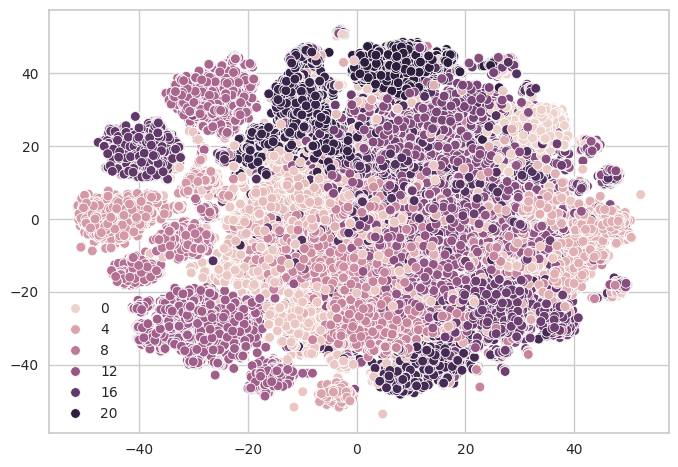

In [3]:
from sklearn.manifold import TSNE
kmeans = KMeans(n_clusters=visualizer.elbow_value_).fit_predict(embs)
tsne = TSNE(n_components=2, verbose=1, n_iter=500).fit_transform(embs)

sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans)
plt.show()